In [11]:
from torchvision import models
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import numpy as np
import Backbone_44
import Channel_Attention
import Spatial_Attention
import FC
import Face_Fake_Net

torch.Size([2, 3, 224, 224])

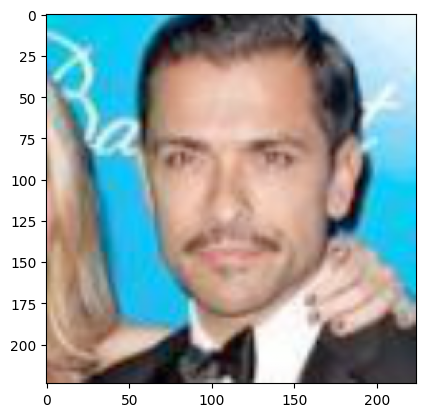

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image = cv2.imread('/media/quocviet/SSD Data/Viet_FAS/CelebA_Spoof/image_preprocessed/live_face/494418.png')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0
plt.imshow(image)
image = image.astype(np.float32)
image = torch.tensor(image)
image = image.permute(2, 0, 1).unsqueeze(0)
image = torch.cat((image, image), dim=0)
image = image.to(device)
image.shape

In [13]:
image.shape

torch.Size([2, 3, 224, 224])

In [14]:
channel = Channel_Attention.Channel_Attention(channels = 2048)
backbone = Backbone_44.Backbone_44()
spatial = Spatial_Attention.Spatial_Attention()
net = Face_Fake_Net.Face_Fake_Net()
net.to(device)
channel.to(device)
spatial.to(device)
x = backbone(image)
x = spatial(x)
x.shape

/home/quocviet/miniconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/quocviet/miniconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([2, 1, 7, 7])

In [15]:
net(image)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same